In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_Q_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        33.1788 (31.0028, 34.8404) (31.1451, 34.9564)  3.8112 (Jnode 202)\n',
 't_n104        23.6077 (21.3487, 25.8322) (21.3801, 25.8616)  4.4815 (Jnode 201)\n',
 't_n105        22.7108 (20.5277, 24.8698) (20.5478, 24.8857)  4.3378 (Jnode 200)\n',
 't_n106        20.7411 (18.7277, 22.7538) (18.7460, 22.7686)  4.0226 (Jnode 199)\n',
 't_n107        20.2348 (18.2652, 22.2081) (18.2544, 22.1950)  3.9406 (Jnode 198)\n',
 't_n108        19.2874 (17.3880, 21.1963) (17.3908, 21.1983)  3.8075 (Jnode 197)\n',
 't_n109        10.4552 ( 9.3272, 11.6133) ( 9.3313, 11.6159)  2.2846 (Jnode 196)\n',
 't_n110        10.2910 ( 9.1789, 11.4341) ( 9.1877, 11.4414)  2.2537 (Jnode 195)\n',
 't_n111         9.9696 ( 8.8866, 11.0916) ( 8.8798, 11.0817)  2.2019 (Jnode 194)\n',
 't_n112         9.5297 ( 8.4769, 10.6160) ( 8.4812, 10.6189)  2.1377 (Jnode 193)\n',
 't_n113         9.2353 ( 8.2071, 10.3026) ( 8.1949, 10.2870)  2.0921 (Jnode 192)\n',
 't_n114         6.6575 ( 5.8127,  7.5511) ( 5.8083,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[33.1788,
 23.6077,
 22.7108,
 20.7411,
 20.2348,
 19.2874,
 10.4552,
 10.291,
 9.9696,
 9.5297,
 9.2353,
 6.6575,
 1.4858,
 4.6793,
 3.2987,
 7.0472,
 5.8795,
 9.4058,
 8.9973,
 4.6858,
 6.9792,
 5.7315,
 6.128,
 8.8309,
 8.2909,
 2.6813,
 9.6295,
 8.7139,
 5.7774,
 4.9097,
 3.9894,
 6.7923,
 5.4541,
 3.603,
 17.935,
 15.1723,
 18.967,
 17.1994,
 15.8464,
 13.421,
 11.6111,
 10.2327,
 8.5216,
 13.3669,
 7.8349,
 16.1842,
 14.5111,
 3.9244,
 1.9228,
 20.9159,
 18.7847,
 16.5447,
 13.0834,
 12.9599,
 19.4682,
 17.6107,
 17.6529,
 22.6829,
 21.2947,
 18.5786,
 8.6229,
 19.1177,
 17.6556,
 15.1413,
 13.0283,
 11.5308,
 19.3122,
 15.8684,
 15.1508,
 14.6735,
 14.4799,
 13.0939,
 12.5351,
 12.2238,
 11.418,
 10.4936,
 9.6165,
 8.2728,
 5.9085,
 10.5467,
 9.6035,
 8.6098,
 11.3462,
 10.2274,
 9.67,
 7.8907,
 8.6466,
 10.2794,
 9.1163,
 7.4665,
 12.3381,
 10.9524,
 11.6133,
 10.7026,
 9.6487,
 6.9028,
 7.5473,
 4.7642,
 1.8381,
 14.6373,
 12.6327]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("PM_MF_p_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[35.0882,
 25.3691,
 24.242,
 21.3998,
 20.5971,
 18.9872,
 9.3239,
 9.2179,
 8.922,
 8.5203,
 8.1388,
 5.7261,
 1.726,
 4.1366,
 3.2968,
 6.3615,
 5.2296,
 8.4944,
 8.1152,
 4.5036,
 6.4546,
 5.3629,
 5.6067,
 7.9959,
 7.4064,
 2.2197,
 8.758,
 7.7437,
 5.3631,
 4.8664,
 4.026,
 5.969,
 4.6773,
 3.9681,
 17.9458,
 13.9649,
 19.4115,
 17.4631,
 15.9051,
 12.6407,
 10.8804,
 9.629,
 7.9648,
 13.1166,
 7.0768,
 15.8734,
 14.4337,
 3.6001,
 1.6307,
 22.2919,
 19.5059,
 16.0413,
 12.2378,
 13.3819,
 20.6583,
 17.805,
 18.2331,
 24.4418,
 22.6857,
 19.8938,
 6.8079,
 20.2801,
 18.89,
 16.0268,
 14.013,
 11.0315,
 20.0208,
 12.8859,
 12.1535,
 11.6286,
 10.8841,
 9.7303,
 9.3047,
 8.8282,
 8.2811,
 7.5765,
 6.8635,
 5.9136,
 4.0697,
 7.6404,
 6.7504,
 5.9121,
 8.3364,
 7.4742,
 7.0256,
 5.5707,
 6.1626,
 7.3262,
 6.3206,
 5.2097,
 9.1564,
 7.9116,
 8.6243,
 7.997,
 6.9823,
 4.9261,
 5.2962,
 4.1636,
 1.4966,
 12.5318,
 10.3451]

In [12]:
posterior_mean_iqtree

[33.1788,
 23.6077,
 22.7108,
 20.7411,
 20.2348,
 19.2874,
 10.4552,
 10.291,
 9.9696,
 9.5297,
 9.2353,
 6.6575,
 1.4858,
 4.6793,
 3.2987,
 7.0472,
 5.8795,
 9.4058,
 8.9973,
 4.6858,
 6.9792,
 5.7315,
 6.128,
 8.8309,
 8.2909,
 2.6813,
 9.6295,
 8.7139,
 5.7774,
 4.9097,
 3.9894,
 6.7923,
 5.4541,
 3.603,
 17.935,
 15.1723,
 18.967,
 17.1994,
 15.8464,
 13.421,
 11.6111,
 10.2327,
 8.5216,
 13.3669,
 7.8349,
 16.1842,
 14.5111,
 3.9244,
 1.9228,
 20.9159,
 18.7847,
 16.5447,
 13.0834,
 12.9599,
 19.4682,
 17.6107,
 17.6529,
 22.6829,
 21.2947,
 18.5786,
 8.6229,
 19.1177,
 17.6556,
 15.1413,
 13.0283,
 11.5308,
 19.3122,
 15.8684,
 15.1508,
 14.6735,
 14.4799,
 13.0939,
 12.5351,
 12.2238,
 11.418,
 10.4936,
 9.6165,
 8.2728,
 5.9085,
 10.5467,
 9.6035,
 8.6098,
 11.3462,
 10.2274,
 9.67,
 7.8907,
 8.6466,
 10.2794,
 9.1163,
 7.4665,
 12.3381,
 10.9524,
 11.6133,
 10.7026,
 9.6487,
 6.9028,
 7.5473,
 4.7642,
 1.8381,
 14.6373,
 12.6327]

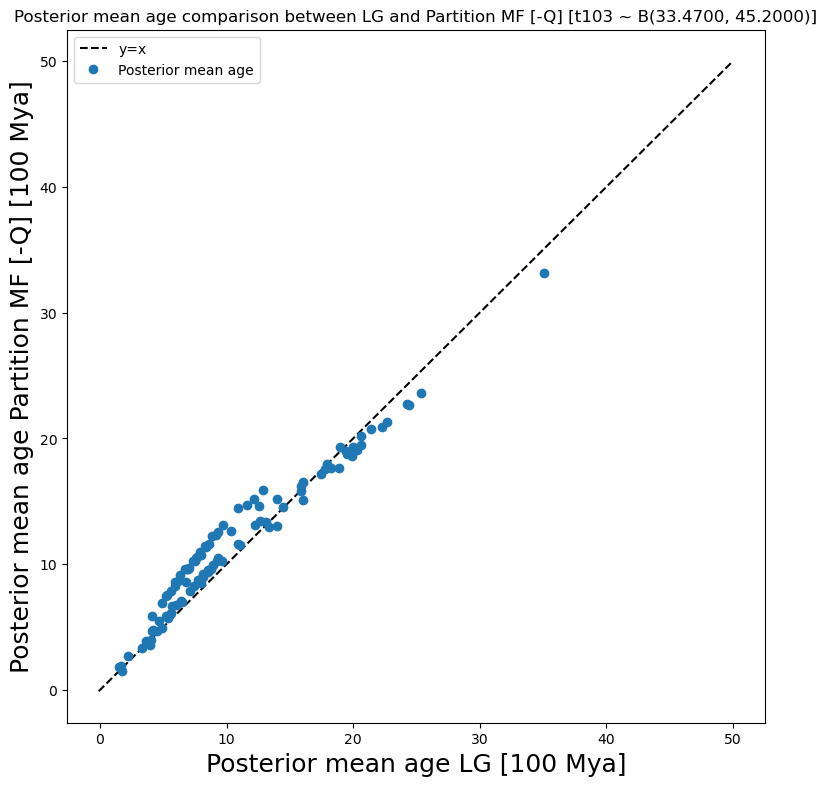

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-Q] [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-Q] [t103 ~ B(33.4700, 45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_Q_root_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')